In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [2]:
def plot_image(img, width=None, height=None, title=None):
    if width and height:
        plt.figure(figsize=(width, height))
    if title:
        plt.title(title)
    if len(img.shape) == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap='gray')

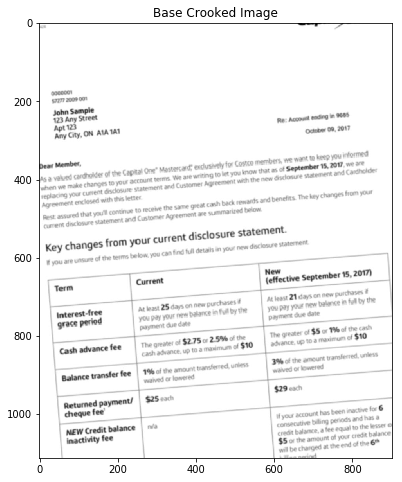

In [3]:
# load in grayscale image
img = cv2.imread('imgs/crooked.jpg', 0) # 0 - Greyscale   1 - Colorscale
# Flip for noise and calculations
inv_img = cv2.bitwise_not(img)
plot_image(img, 8, 8, title="Base Crooked Image")

## Thresholded 
* Contours work best on Blurred & Thresholded images

### Blurring
* When choosing a bounding box we are unaware of angle of text
* Could try various (w, h) options??
* GaussianBlur is often more natural looking

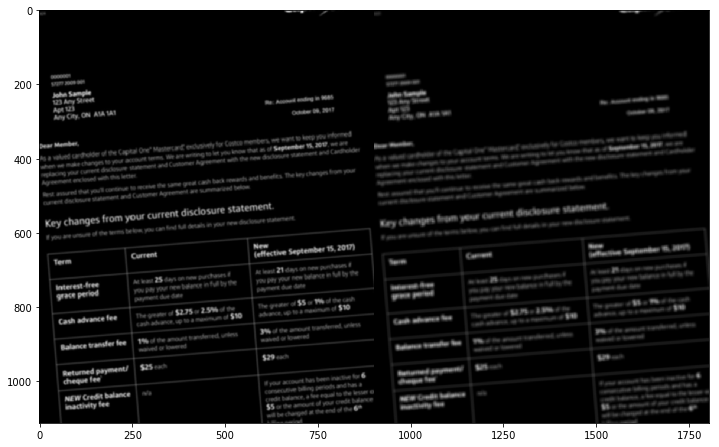

In [4]:
# Actual
blurred = cv2.GaussianBlur(inv_img, (9, 9), 20)

# To test various blurring methods
blurring_options = np.hstack([
    cv2.blur(inv_img, (5, 5)),
    blurred 
])

plot_image(blurring_options, 12, 12)

### Thresholding
* Goal: Get single lines of text

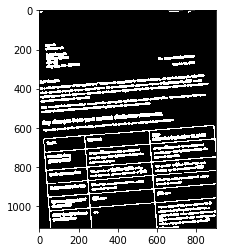

In [5]:
#T, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) Yields too many contours
T, thresh = cv2.threshold(blurred, 20, 255, cv2.THRESH_BINARY)
plot_image(thresh)

In [6]:
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

90

In [7]:
# Convert to color so we can draw contours in color
thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

### Visulaize contours

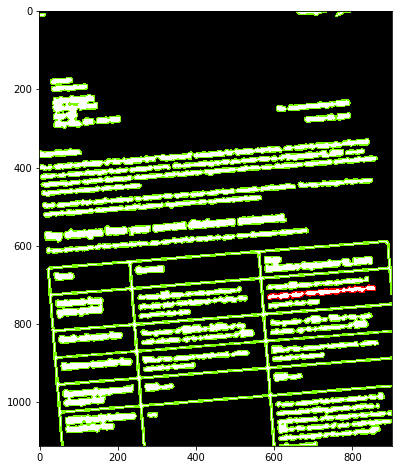

In [8]:
# Draw the contours
thresh_w_drawings = thresh.copy()

GREEN = (124,252,0)
RED = (255, 0, 0)

for i, j in enumerate(contours):
    cv2.drawContours(thresh_w_drawings, contours, i, GREEN, 2)
    
cv2.drawContours(thresh_w_drawings, contours, 20, RED, 2)

plot_image(thresh_w_drawings, 8, 8)

### Draw rectangles around Contours

-4.5377726554870605

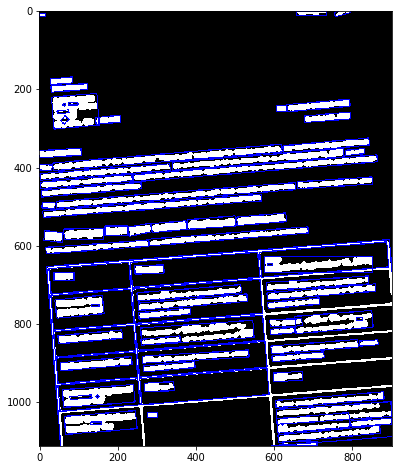

In [18]:
# Draw rotated bounding rectangles around countors
thresh_copy = thresh.copy()

angles_array = np.array([])

for i, cnt in enumerate(contours):
    rect = cv2.minAreaRect(cnt)
    angles_array = np.append(angles_array, rect[-1])
    
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(thresh_copy,[box],0,(0,0,255),2)

plot_image(thresh_copy, 8, 8)

# TODO: Better way than median?
median_angle = np.median(angles_array)
median_angle

### Rotate Matrix and Plot
* Sets of parallel lines remain parallel after an affine transformation.

In [19]:
if median_angle < -45:
    median_angle = -(90 + median_angle)
else:
    median_angle = -median_angle
median_angle = median_angle*-1 # Correction direction opposite to direction of box
median_angle

-4.5377726554870605

In [20]:
(h, w) = thresh.shape[:2] # Only care about width, height, not channels
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, median_angle, 1.0) # 1.0 is the scale factor
rotated = cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REPLICATE, flags=cv2.INTER_CUBIC)

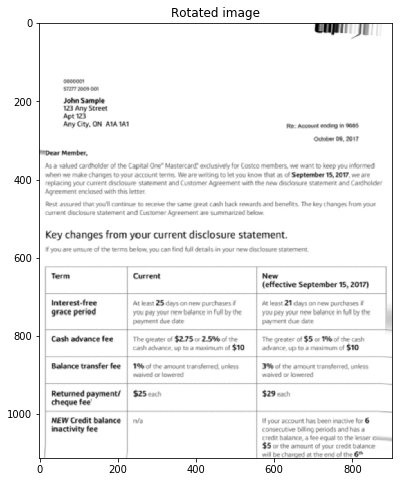

In [21]:
plot_image(rotated, 8, 8, title="Rotated image")